@author: Rohit Sharma

In this notebook, First I have done some exploration on the data using matplotlib and seaborn. 
Then, I use different random forest classifier models to predict the quality of the wine.

References:
    - Chapter 2 of the text book
    - https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine
    
    
Data Set:
Using chemical analysis determine the origin of wines

https://archive.ics.uci.edu/ml/datasets/wine

Reponse variable: quality

Predictor: fixed_acidity, volatile_acidity,	citric_acid, residual_sugar, chlorides,	free_sulfur_dioxide, total_sulfur_dioxide	density, pH, sulphates,	alcohol

In [155]:
#Importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
#to include matplotlib graphs in notebook
%matplotlib inline  

In [125]:
#Loading dataset
red_wine = pd.read_csv(r"C:\Users\rcroh\Desktop\Spring 18\DSP\Assignment\Assignment 3\DataSet\wineQualityReds.csv")

In [115]:
#Generating desciptive statistics
red_wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [116]:
#Let's check how the data is distributed
red_wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [117]:
#Last 5 data rows
red_wine.tail()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [118]:
#Information about the data columns
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [126]:
#Returns object containing counts of unique values
red_wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [127]:
#Renaming the field values
red_wine.rename(columns={'fixed.acidity': 'fixed_acidity','citric.acid':'citric_acid',
                       'volatile.acidity':'volatile_acidity','residual.sugar':'residual_sugar',
                       'free.sulfur.dioxide':'free_sulfur_dioxide','total.sulfur.dioxide':'total_sulfur_dioxide'}, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F589259B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021F5E527C50>]], dtype=object)

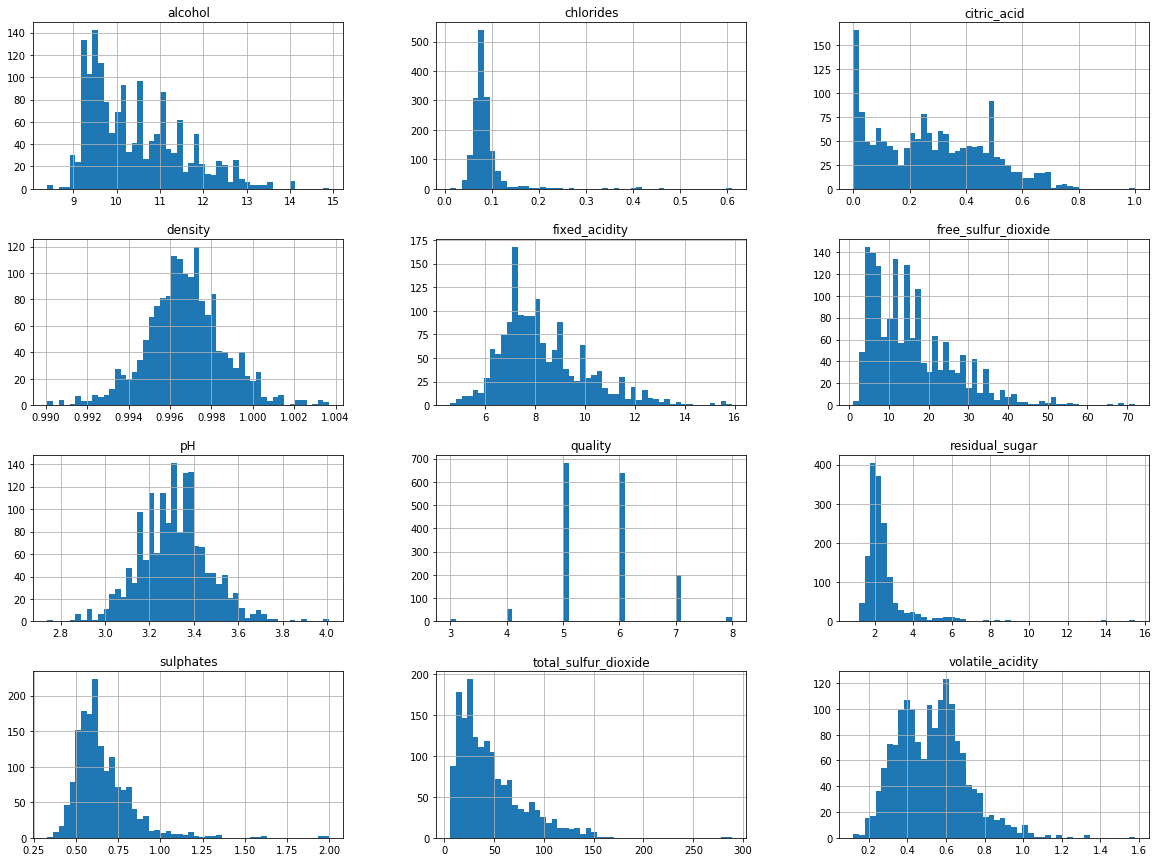

In [128]:
#Compute the histogram of a set of data.
red_wine.hist(bins=50,figsize=(20,15))

In [129]:
#Computing pairwise correlation of columns
print(red_wine.corr())

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.256131     0.671703   
volatile_acidity          -0.256131          1.000000    -0.552496   
citric_acid                0.671703         -0.552496     1.000000   
residual_sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free_sulfur_dioxide       -0.153794         -0.010504    -0.060978   
total_sulfur_dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

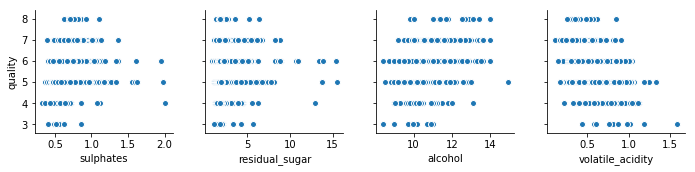

In [130]:
#Plot pairwise relationships in a dataset.
sns.pairplot(red_wine, x_vars={'alcohol','sulphates','volatile_acidity','residual_sugar'}, y_vars='quality') 

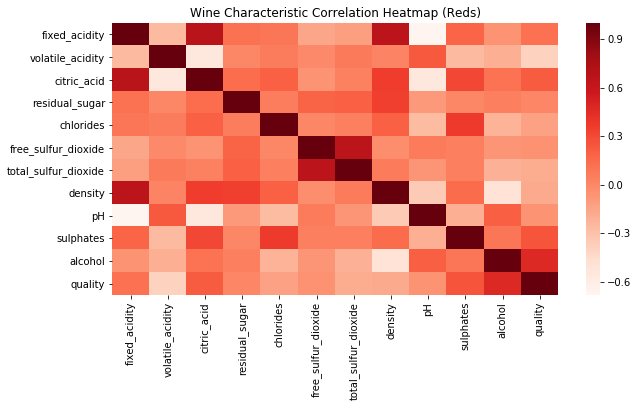

In [131]:
#Plot rectangular data as a color-encoded matrix.
plt.subplots(figsize=(10,5))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = red_wine.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")

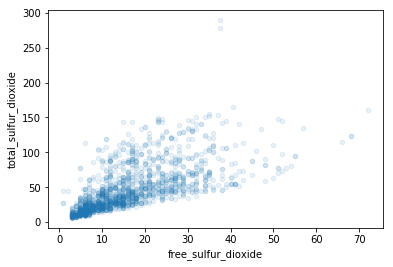

In [124]:
#Make scatter of DataFrame using matplotlib 
red_wine.plot(kind="scatter",x="free_sulfur_dioxide",y="total_sulfur_dioxide", alpha=0.1)

Positive correlation of Free SO2 and Total SO2 are summarized above.
Most of the points seems to be clustered around 0-20 mg / dm3 Free SO2 and 0-50 mg / dm3 Total SO2.

Preprocessing Data for performing Machine learning algorithms

In [140]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
red_wine['quality'] = pd.cut(red_wine['quality'], bins = bins, labels = group_names)

In [143]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [144]:
#Bad becomes 0 and good becomes 1 
red_wine['quality'] = label_quality.fit_transform(red_wine['quality'])

In [145]:
red_wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [146]:
#Now seperate the dataset as response variable and feature variabes
X = red_wine.drop('quality', axis = 1)
y = red_wine['quality']

In [147]:
#Train and Test splitting of data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [148]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [149]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [150]:
#Random Forest uses averaging to improve the predictive accuracy and control over-fitting
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [151]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       273
          1       0.68      0.40      0.51        47

avg / total       0.87      0.88      0.87       320



Random forest gives the accuracy of 87%

In [152]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 28  19]]
